<a href="https://colab.research.google.com/github/qriovider/queueing_theory/blob/main/MMc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install simpy

In [ ]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# list for 
sojourn_t = []
obs_times = []
q_length = []

LAMBDA = 2
MU = 5

def generate_interarrival():
  return np.random.exponential(1./LAMBDA)

def generate_service():
  return np.random.exponential(1./MU)

def arriving(env, servers):
  i = 0
  while True:
    i = i + 1
    yield env.timeout(generate_interarrival())
    env.process(service(env, i, servers))

def service(env, customer, servers):
  with servers.request() as request:
    t_arrival = env.now
    print (env.now, 'customer {} arrives'.format(customer))
    yield request
    print (env.now, 'customer {} is being served'.format(customer))
    yield env.timeout(generate_service())
    print (env.now, 'customer {} departs'.format(customer))
    t_depart = env.now
    sojourn_t.append(t_depart - t_arrival)

def observe(env, servers):
  while True:
    obs_times.append(env.now)
    q_length.append(len(servers.queue))
    yield env.timeout(1.0)


In [ ]:
np.random.seed(0)

env = simpy.Environment()
servers = simpy.Resource(env, capacity=1)  # capacity is the number of servers
env.process(arriving(env, servers))
env.process(observe(env, servers))
env.run(until=100)

0.397937254081555 customer 1 arrives
0.397937254081555 customer 1 is being served
0.5825818832423688 customer 1 departs
1.0259026355644738 customer 2 arrives
1.0259026355644738 customer 2 is being served
1.1361123337835737 customer 2 departs
1.4195032117231092 customer 3 arrives
1.4195032117231092 customer 3 is being served
1.5346070515568373 customer 3 departs
1.938582859194914 customer 4 arrives
1.938582859194914 customer 4 is being served
2.6015652956056767 customer 4 departs
3.0503450657112423 customer 5 arrives
3.0503450657112423 customer 5 is being served
3.292146116162369 customer 6 arrives
3.364124293705076 customer 5 departs
3.364124293705076 customer 6 is being served
3.532010863052841 customer 6 departs
3.668483170930663 customer 7 arrives
3.668483170930663 customer 7 is being served
3.6832202419132325 customer 7 departs
4.967610247893384 customer 8 arrives
4.967610247893384 customer 8 is being served
4.971695365230229 customer 8 departs
5.013190762452884 customer 9 arrives


Text(0, 0.5, 'Queue Length')

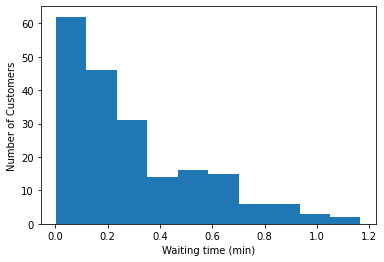

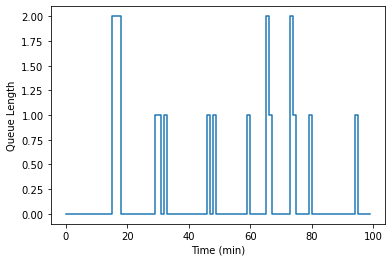

In [ ]:
plt.hist(sojourn_t)
plt.xlabel('Sojourn time (min)')
plt.ylabel('Number of Customers')

plt.figure()
plt.step(obs_times, q_length, where = 'post')
plt.xlabel('Time (min)')
plt.ylabel('Queue Length') 